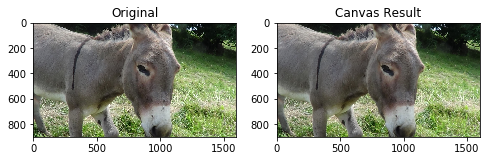

In [16]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def blurImage(image):
    rows,cols,dims = image.shape
    image2 = np.double(image)
    ret_img = np.uint8(255*np.ones((rows,cols,dims)))
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            for k in range(0,3):
                sum = image2[i,j,k]+image2[i-1,j,k]+image2[i,j-1,k]+image2[i+1,j,k]+image2[i,j+1,k]
                average = sum/5
                ret_img[i,j,k] = np.uint8(average)
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/donkey.jpg')
plt.figure(num=0,figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)

img2 = blurImage(img)

plt.subplot(1,2,2)
plt.title('Canvas Result')
plt.imshow(img2)
plt.show()

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def blendingImages(image1, image2, StartX, StartY):
    rows1,cols1,dims1 = image1.shape
    rows2,cols2,dims2 = image2.shape
    
    image1l = np.double(image1)
    image2l = np.double(image2)
    
    ret_img = np.uint8(255*np.ones((500,500,3)))
    for i in range(0,rows1):
        for j in range(0,cols1):
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8(image1l[i,j,k])
    for i in range(StartY+0, StartY+rows2):
        for j in range(StartX+0, StartX+cols2):
            if ret_img[i,j,0] == 255 and ret_img[i,j,1] == 255 and ret_img[i,j,2] == 255:
                for k in range(0,3):
                    ret_img[i,j,k] = np.uint8(image2l[i-StartY,j-StartX,k])
            else:
                for k in range(0,3):
                    ret_img[i,j,k] = np.uint8((ret_img[i,j,k] + image2l[i-StartY,j-StartX,k])/2)
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/donkey.jpg')
img2 = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/road.jpg')

StartX = 100
StartY = 100
img3 = blendingImages(img,img2,StartX,StartY)

plt.figure(num=1,figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Horse')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('Road')
plt.imshow(img2)

plt.subplot(1,3,3)
plt.title('BLend')
plt.imshow(img3)
plt.show()

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def drawLine(image, color, lineStep):
    rows,cols,dims = image.shape
    ret_img = np.uint8(image)
    
    for i in range(lineStep, rows, lineStep):
        for j in range(0, cols):
            for k in range(0, 3):
                ret_img[i,j,k] = np.uint8(color[k])
    for i in range(0,cols):
        for j in range(lineStep, cols, lineStep):
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8(color[k])
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/donkey.jpg')

color = [255,0,0]
step = 20

plt.figure(num= 2, figsize = (8,8))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(img)

img2 = drawLine(img, color, step)

plt.subplot(1,2,2)
plt.title('Lined')
plt.imshow(img2)
plt.show()

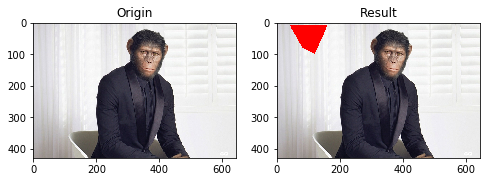

In [5]:
from skimage import io, draw
import matplotlib.pyplot as plt
import numpy as np

def drawpolygon(image,color, colX, lineY):
    rows,cols,dims = image.shape
    ret_img = np.uint8(image)
    
    rr,cc = draw.polygon(lineY,colX)
    draw.set_color(ret_img,[rr,cc],color)
    
    return ret_img

img = io.imread('C:/Users/S_H/Documents/Multimedia/圖片檔ver2/ape.jpg')
color = [255,0,0]
lineY = [10,10,100,80]
colX = [40,160,120,80]

plt.figure(num=5,figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Origin')
plt.imshow(img)

img2 = drawpolygon(img,color,colX,lineY)

plt.subplot(1,2,2)
plt.title('Result')
plt.imshow(img2)
plt.show()

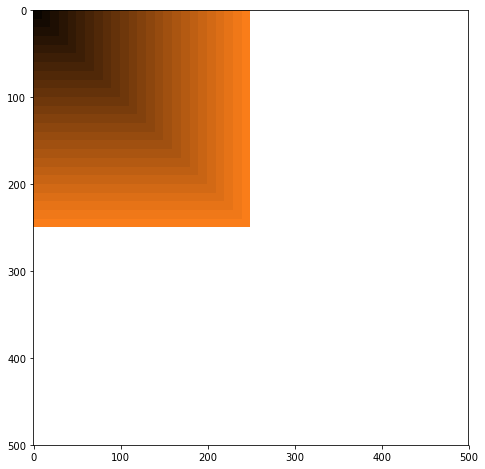

In [6]:
from skimage import io, draw
import matplotlib.pyplot as plt
import numpy as np

def drawpyramid(canvasSize):
    ret_img = np.uint8(255*np.ones((canvasSize[0],canvasSize[1],3)))
    
    for index in range(25,0,-1):
        color = [index*10, index*5, index]
        lineY = [0,0,index*10,index*10]
        colX = [0,index*10,index*10,0]
        rr,cc = draw.polygon(lineY, colX)
        draw.set_color(ret_img,[rr,cc],color)
    return ret_img

plt.figure(num=6,figsize=(8,8))

canvasSize = [500,500]

img = drawpyramid(canvasSize)

plt.imshow(img)
plt.show()